# Tutorial 10: Dataset with unpaired features

In almost all deep learning applications, different features within a dataset are paired together as single example. For instance, image and label(s) are paired in image classification, image and mask(s) are paired in image segmentation.

However, in image-image translation, sometimes the features in dataset are unpaired. For example, we may have 500 horse images for 700 zebra images. During the training, we need to randomly select one horse image and one zebra image. 

In FastEstimator, unpaired features are handled by `RecordWriter`. If there are multiple unpaired features, express them as __tuple__  in the `train_data`, `validation_data` and `ops` argument of `RecordWriter`.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import shutil
import fastestimator as fe

## Step 0 - Data preparation and visualization
We will here use the horse2zebra dataset.

In [2]:
from fastestimator.dataset.horse2zebra import load_data

# Use load_data from our dataset API to load the dataset.
trainA_csv, trainB_csv, valA_csv, valB_csv, parent_path = load_data()
print("horse image is stored in {}".format(trainA_csv))
print("zebra image is stored in {}".format(trainB_csv))

horse image is stored in /home/ubuntu/fastestimator_data/horse2zebra/trainA.csv
zebra image is stored in /home/ubuntu/fastestimator_data/horse2zebra/trainB.csv


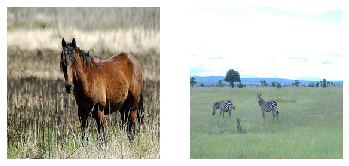

In [3]:
# Let's take a look at the data, by loading the csv file with all images path information.
df_train_A = pd.read_csv(trainA_csv)
df_train_B = pd.read_csv(trainB_csv)

fig, axes = plt.subplots(1, 2)
axes[0].axis('off')
axes[1].axis('off')

# We select one image of horse and one of zebra and plot them.
img1 = plt.imread(os.path.join(parent_path, df_train_A["imgA"][2]))
axes[0].imshow(img1)

img2 = plt.imread(os.path.join(parent_path, df_train_B["imgB"][2]))
axes[1].imshow(img2)

## Step 1 - RecordWriter: read unpaired features using a tuple

We deal with the unpaired images in RecordWriter. In ops, we specify a tuple of two ops: to load the first image and to load the second one (here using ImageReader).

In [4]:
from fastestimator.op.numpyop import ImageReader
from fastestimator.util import RecordWriter

target_dir = os.path.join(parent_path, 'FEdata')

# Check whether the target folder already exists. RecordWriter either needs an empty or non-exist target folder.    
if os.path.exists(target_dir):
    shutil.rmtree(target_dir)

# Create a RecordWriter with a tuple of two ops to pair images.
writer = RecordWriter(save_dir=target_dir,
                         train_data=(trainA_csv, trainB_csv),   #this is a tuple
                         validation_data = (valA_csv, valB_csv), #this is a tuple
                         ops=([ImageReader(inputs="imgA", outputs="imgA", parent_path=parent_path)], # first tuple element
                              [ImageReader(inputs="imgB", outputs="imgB", parent_path=parent_path)])) # second tuple element

In [5]:
# We write the data to the disk using the write method
writer.write()

FastEstimator: Saving tfrecord to /home/ubuntu/fastestimator_data/horse2zebra/FEdata
FastEstimator: Converting Train TFRecords 0.0%, Speed: 0.00 record/sec
FastEstimator: Converting Train TFRecords 4.9%, Speed: 1007.86 record/sec
FastEstimator: Converting Train TFRecords 9.7%, Speed: 1078.52 record/sec
FastEstimator: Converting Train TFRecords 14.6%, Speed: 1134.03 record/sec
FastEstimator: Converting Train TFRecords 19.5%, Speed: 1159.41 record/sec
FastEstimator: Converting Train TFRecords 24.3%, Speed: 1164.55 record/sec
FastEstimator: Converting Train TFRecords 29.2%, Speed: 1179.34 record/sec
FastEstimator: Converting Train TFRecords 34.1%, Speed: 1174.25 record/sec
FastEstimator: Converting Train TFRecords 39.0%, Speed: 1161.07 record/sec
FastEstimator: Converting Train TFRecords 43.8%, Speed: 1150.87 record/sec
FastEstimator: Converting Train TFRecords 48.7%, Speed: 1146.21 record/sec
FastEstimator: Converting Train TFRecords 53.6%, Speed: 1143.16 record/sec
FastEstimator: Conver